In [226]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings

%matplotlib inline

In [227]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [228]:
df = pd.read_csv("auto.csv", names = headers)

In [229]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [230]:
df.shape

(205, 26)

In [231]:
df.replace("?", np.nan, inplace = True)

In [232]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [233]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [234]:
for column in df.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

In [235]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [236]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [237]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [238]:
avg_bore = df["bore"].astype("float").mean(axis=0)
print("Average of bore", avg_bore)

Average of bore 3.3297512437810943


In [239]:
df["bore"].replace(np.nan, avg_bore, inplace = True)

In [240]:
# Write your code below and press Shift+Enter to execute 
avg_stroke = df["stroke"].astype("float").mean(axis=0)
df["stroke"].replace(np.nan, avg_stroke, inplace = True )
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [241]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


In [242]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [243]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


In [244]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [245]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

In [246]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [247]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [248]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [249]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [250]:
df.dtypes


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [251]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [252]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [253]:
df_test = df[["make", "num-of-doors", "price"]]

In [254]:
df_test

,make,num-of-doors,price
0,alfa-romero,two,13495.0
1,alfa-romero,two,16500.0
2,alfa-romero,two,16500.0
3,audi,four,13950.0
4,audi,four,17450.0
...,...,...,...
196,volvo,four,16845.0
197,volvo,four,19045.0
198,volvo,four,21485.0
199,volvo,four,22470.0


In [255]:
df_grp = df_test.groupby(["make", "num-of-doors"], as_index=False).mean()

In [256]:
df_grp

,make,num-of-doors,price
0,alfa-romero,two,15498.333333
1,audi,four,18381.000000
2,audi,two,15250.000000
3,bmw,four,26047.000000
4,bmw,two,26238.333333
5,chevrolet,four,6575.000000
6,chevrolet,two,5723.000000
7,dodge,four,7601.800000
8,dodge,two,8217.500000
9,honda,four,9335.000000


In [257]:
corrmat = df[["price",'bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings


<Axes: >

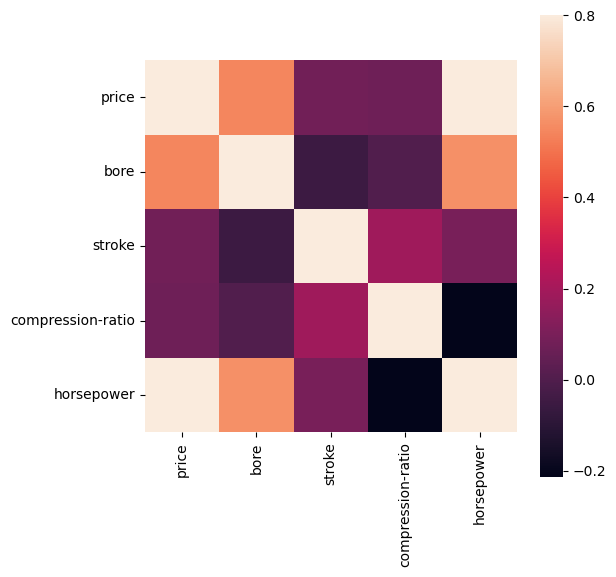

In [259]:
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corrmat, vmax = .8, square = True)

In [260]:
pip install skillsnetwork

Note: you may need to restart the kernel to use updated packages.


In [261]:
import skillsnetwork
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [262]:
lm_hmpg = LinearRegression()
lm_hmpg

LinearRegression()

In [263]:
X1 = df[["highway-mpg"]]
Y1 = df[["price"]]

In [264]:
lm_hmpg.fit(X1,Y1)

LinearRegression()

In [265]:
Yhat1 = lm_hmpg.predict(X1)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [266]:
 #value of the intercept (a)
lm_hmpg.intercept_

array([38423.30585816])

In [267]:
#value of the slope (b)
lm_hmpg.coef_

array([[-821.73337832]])

In [268]:
#Regresiòn final
#Yhat = a + bX 
#Price = 38423.31 - 821.73*highway-mpg

In [269]:
lm_es = LinearRegression()
lm_es

LinearRegression()

In [270]:
X2 = df[["price"]]
Y2 = df[["engine-size"]]

In [271]:
lm_es.fit(X2,Y2)

LinearRegression()

In [272]:
Yhat2 = lm_es.predict(X2)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [273]:
lm_es.intercept_

array([66.64422806])

In [274]:
lm_es.coef_

array([[0.00456052]])

In [275]:
#Regresion lineal multiple
lmz = LinearRegression()
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [276]:
lmz.fit(Z, df['price'])

LinearRegression()

In [277]:
Yhat3 = lmz.predict(Z)
Yhat3[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [278]:
lmz.intercept_

-15806.624626329227

In [279]:
lmz.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

(0.0, 48160.01659868861)

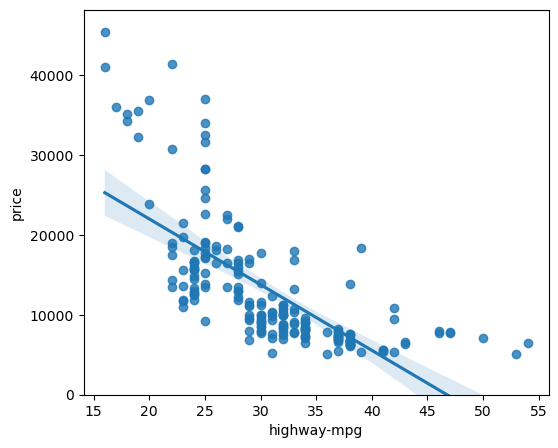

In [280]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

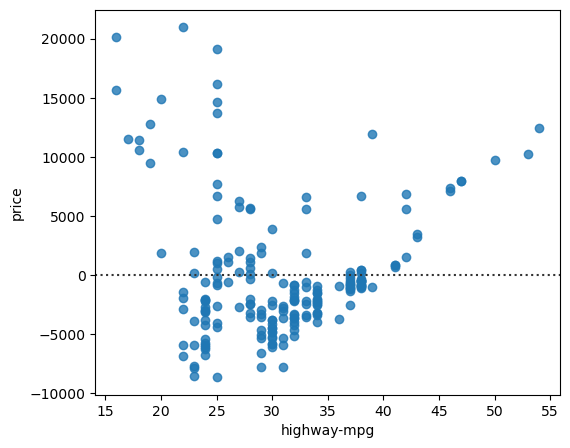

In [281]:
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

(0.0, 47414.1)

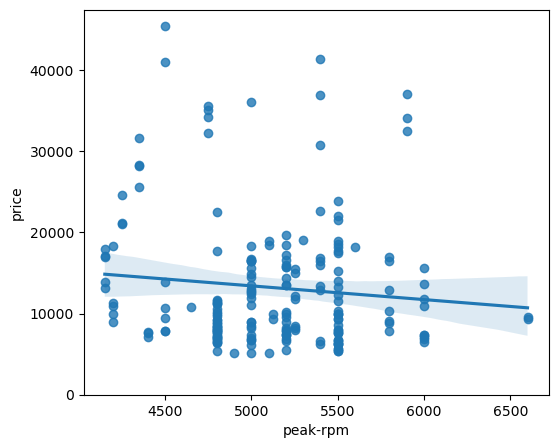

In [282]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

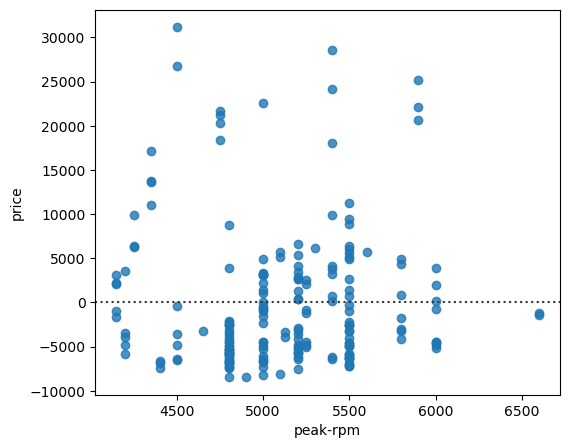

In [283]:
plt.figure(figsize=(width, height))
sns.residplot(x=df['peak-rpm'],y=df['price'])
plt.show()

In [284]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<Axes: >

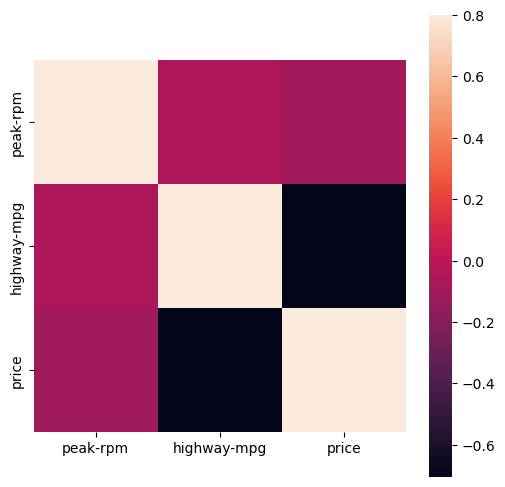

In [285]:
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df[["peak-rpm","highway-mpg","price"]].corr(), vmax = .8, square = True)

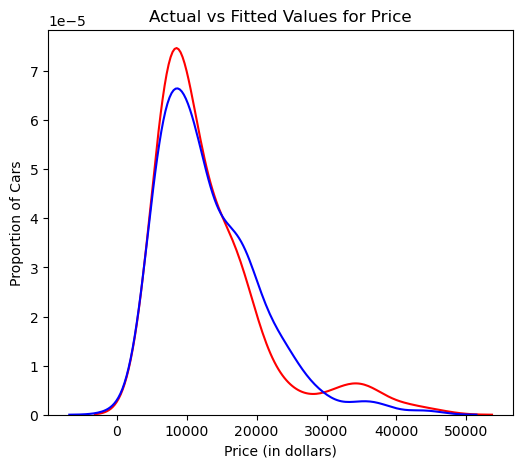

In [286]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat3, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [287]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [288]:
xp = df['highway-mpg']
yp = df['price']

In [289]:
f = np.polyfit(xp, yp, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


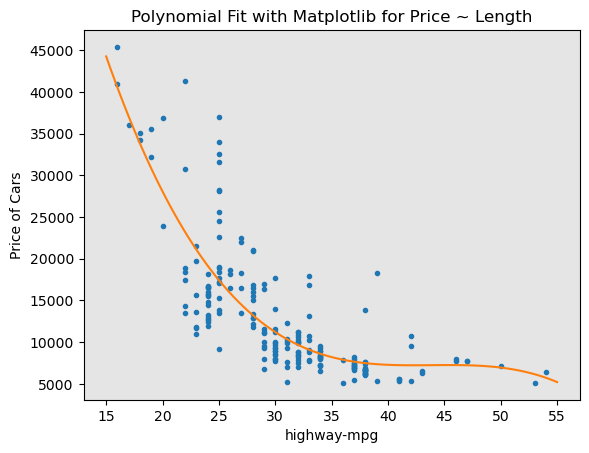

In [290]:
PlotPolly(p, xp, yp, 'highway-mpg')

In [291]:
np.polyfit(xp, yp, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [292]:
f = np.polyfit(xp, yp, 11)
p = np.poly1d(f)
print(p)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


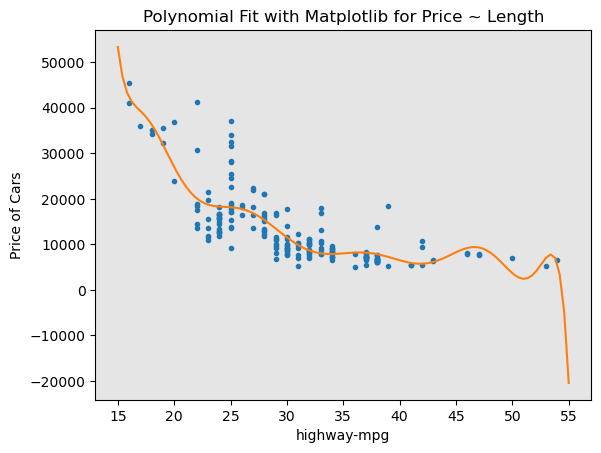

In [293]:
PlotPolly(p, xp, yp, 'highway-mpg')

In [294]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [295]:
Z_pr=pr.fit_transform(Z)

In [296]:
Z.shape

(201, 4)

In [297]:
Z_pr.shape

(201, 15)

In [298]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [299]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [300]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [301]:
y = df['price']
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [302]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [303]:
#SIMPLE LINEAR REGRESSION
lm_hmpg.fit(X1,Y1)
# Find the R^2
print('The R-square is: ', lm_hmpg.score(X1, Y1))

The R-square is:  0.4965911884339175


In [304]:
Yhat=lm_hmpg.predict(X1)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [305]:
from sklearn.metrics import mean_squared_error

In [306]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


In [307]:
#MULTIPLE LINEAR REGRESSION
# fit the model 
lm_hmpg.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm_hmpg.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [308]:
#We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [309]:
Y_predict_multifit = lm_hmpg.predict(Z)

In [310]:
print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [326]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [327]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [328]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 6
    height = 5
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [329]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 6
    height = 5
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [330]:
y_data = df['price']

In [331]:
x_data=df.drop('price',axis=1)
x_data

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,2.68,9.0,111.0,5000.0,21,27,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,2.68,9.0,111.0,5000.0,21,27,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,3.47,9.0,154.0,5000.0,19,26,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,3.40,10.0,102.0,5500.0,24,30,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,3.40,8.0,115.0,5500.0,18,22,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,-1,95,volvo,std,four,sedan,rwd,front,...,3.15,9.5,114.0,5400.0,23,28,10.217391,Medium,0,1
197,197,197,-1,95,volvo,turbo,four,sedan,rwd,front,...,3.15,8.7,160.0,5300.0,19,25,12.368421,High,0,1
198,198,198,-1,95,volvo,std,four,sedan,rwd,front,...,2.87,8.8,134.0,5500.0,18,23,13.055556,Medium,0,1
199,199,199,-1,95,volvo,turbo,four,sedan,rwd,front,...,3.40,23.0,106.0,4800.0,26,27,9.038462,Medium,1,0


In [334]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [340]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.40, random_state=0)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 81
number of training samples: 120


In [342]:
from sklearn.linear_model import LinearRegression
lre = LinearRegression()
lre

LinearRegression()

In [343]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [345]:
#calculate the R^2 on the test data:
lre.score(x_test[['horsepower']], y_test)

0.7139364665406973

In [346]:
#the R^2 is much smaller using the test data compared to the training data.
lre.score(x_train[['horsepower']], y_train)

0.5754067463583004

In [349]:
#CROSS VALIDATION SCORE
from sklearn.model_selection import cross_val_score

In [350]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [351]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [352]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5220099150421194 and the standard deviation is 0.2911839444756025


In [353]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247589])

In [354]:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

In [355]:
from sklearn.model_selection import cross_val_predict

In [356]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])